從以前看到一些人(大部分是用 ```MacOS``` )，他們的 Terminal 的那一條提示字元都很好看。

但因為看起來很複雜，且其實我當時以為那功能是只有 ```MacOS``` 系統才可以使用。

直到最近突然看到一個網頁在教安裝 [Oh my posh](https://github.com/JanDeDobbeleer/oh-my-posh)，才知道 Windows 也可以設定! 

於是有了這篇文章。

### 1.

一開始照著[這篇文章](https://hsiangfeng.github.io/other/20190924/3446878284/)做:

```PowerShell
Install-Module posh-git -Scope CurrentUser
Install-Module oh-my-posh -Scope CurrentUser
```

在 ```powershell``` 輸入:  (註: 要用```powershell``` highlight，使用關鍵字```PowerShell```)
```PowerShell
$profile
```

得到路徑:
```PowerShell
C:\Users\User\Documents\WindowsPowerShell\Microsoft.PowerShell_profile.ps1
```

打開那個檔案，輸入下列內容:
```PowerShell
Import-Module posh-git
Import-Module oh-my-posh
Set-Theme Agnoster
```
這樣之後打開 terminal 就不用在 import 了。

[執行```ps1```檔](https://blog.twtnn.com/2013/11/windows-powershell.html)

### 2. 照如上步驟完成後，發現:

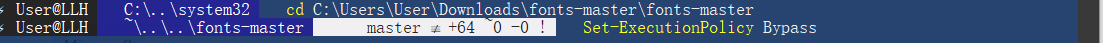

提示字元並沒有完全跑出來，之後查了資料，發現是<font color='red'> 字體 </font> 的問題。  
應該使用支持```powerline```的字體。  
在網路上找到[這篇文章](https://medium.com/@slmeng/how-to-install-powerline-fonts-in-windows-b2eedecace58)跟著做:
下載```fonts-master.zip``` 後使用```install.ps1```做操作。[在這裡本人犯了一個愚蠢的錯誤，誤將```ps1```檔看成是```psl```檔]。


先到 ```github```下載 ```powerline```字體: [github 連結](https://github.com/powerline/fonts)。  
下載方法: 
```PowerShell
# clone
git clone https://github.com/powerline/fonts.git --depth=1
# install
cd fonts
./install.sh
# clean-up a bit
cd ..
rm -rf fonts
```

但是在執行 ```./install.sh```時，發現問題(我記得這邊有問題)。
解決方法:
- 用 ```Administrator```進入 ```powershell```。(```Windows + X```)。
- 因為你現在用系統管理員的身分進入，因此預設路徑是```C:\WINDOWS\system32```。把路徑改成```fonts-master```的那個資料夾。  
(```cd ${HOME}\Downloads\fonts-master\fonts-master```)
- 接著要設定[Execution Policy](https://ss64.com/ps/set-executionpolicy.html):
```Powershell
Set-ExecutionPolicy Bypass
```
這時候就可以執行 ```./install.ps1``` 了!
---
註: 之後要把 ```Execution Policy``` 改回來，只要打:
```PowerShell
Set-ExecutionPolicy Default
```
就可以了。

### 3. 字體設定問題:

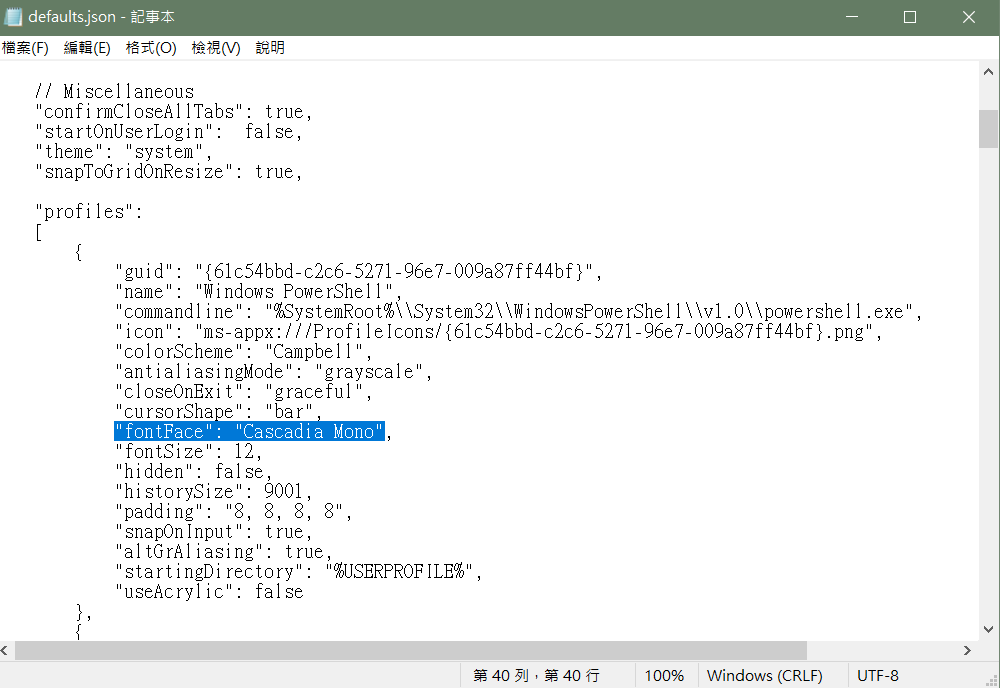

怎麼在 ```Windows Terminal``` 叫出這個筆記本? 按住```alt```之後打開```設定```。

可以看到 default 的字體是 ```Cascadia Mono```。  
這並不是```powerline```的字體，因此我們要改掉他。  
興沖沖跑去 ```powershell```的```內容```(```powerline```上方右鍵```內容(P)```)發現只有一些基本的字體，剛才上一步下載的字體都沒辦法選擇。

根據[這篇文章](https://blog.miniasp.com/post/2017/12/06/Microsoft-YaHei-Mono-Chinese-Font-for-Command-Prompt-and-WSL)的說法:
> 主要就出在「所有的字型都有設定可以支援的字集範圍」，字型本身雖然支援 Unicode 而且支援所有中文字，  
但如果字型檔沒有設定該字型支援哪些 non- Unicode 字集的話，在這邊就無法選取，  
因為電腦並不知道這個字型是否可以在命令提示字元中正常顯示文字。

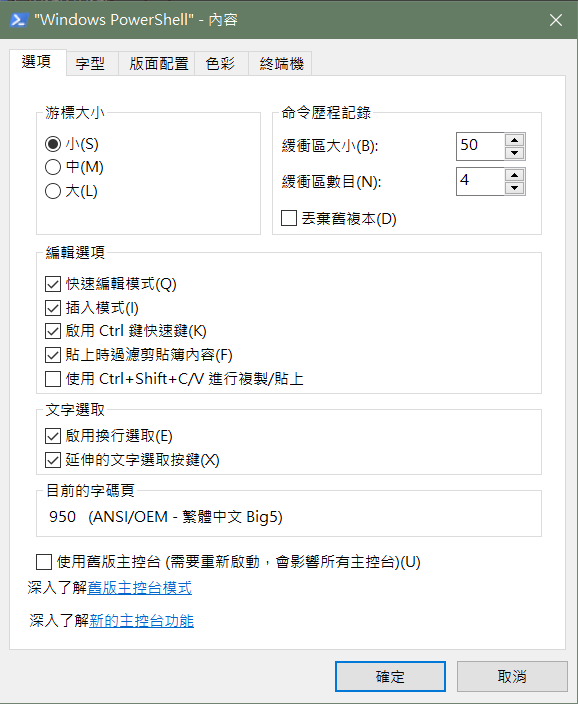

可以看到目前的字碼頁是```950```。  
但 ```UFT-8 Unicode``` 的字碼頁是```65001```。

解決方法是將```powershell```的編碼方式改成 ```Unicode```。  
- 使用 ```chcp``` 可以查看目前所使用編碼的[頁碼(code page)](https://zh.wikipedia.org/wiki/%E4%BB%A3%E7%A0%81%E9%A1%B5)是甚麼。
- 而 ```UTF-8 Unicode``` 的頁碼是 ```65001```。
- 要轉換頁碼，輸入```chcp 65001```即可切換成 ```UTF-8 Unicode```。

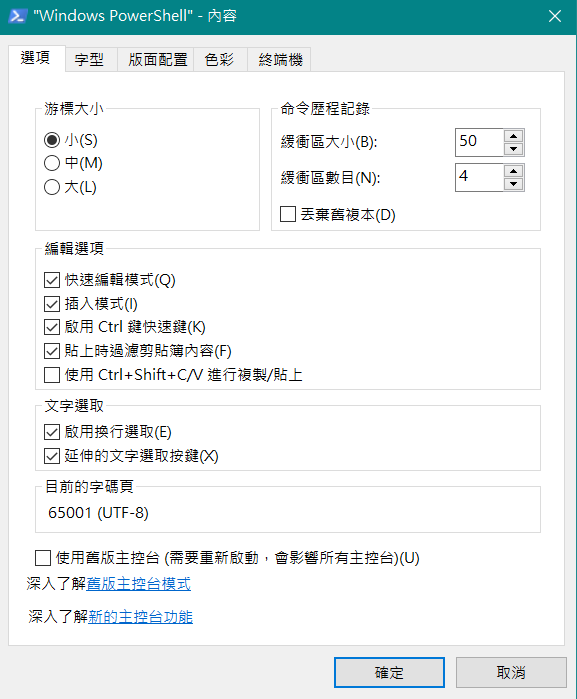

再查看一次，這時候字碼頁變成了```65001(UTF-8)```。

但上面的作法只是暫時的，等到下一次你再開啟 ```powershell```，他還是會變回 ```950``` 的字碼頁。  
要永久更改，[參考這篇文章](https://www.thinkinmd.com/post/2020/02/21/command-prompt-and-windows-powershell-default-use-utf-8/) 照做後就可以了。

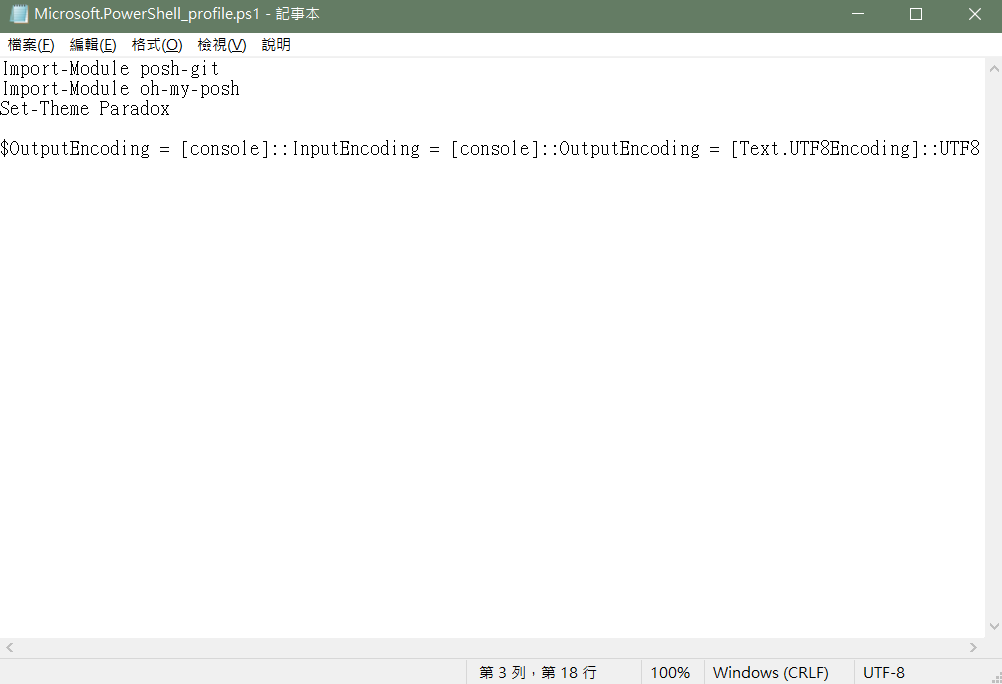

之後再到```powershell```的```內容(P)```就可以看到剛才下載的 ```powerline``` 字體了。  
註: 當然也可以用 ```Windows Terminal```去```設定```改。

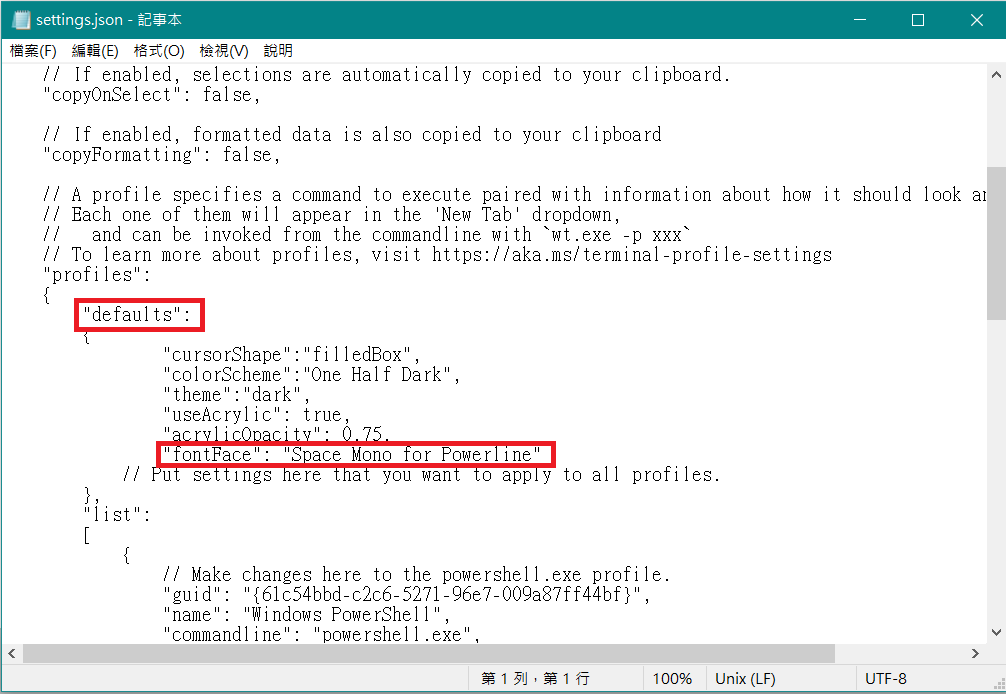

選好後，再重新打開 ```powershell```，就會發現提示字元完整呈現了。
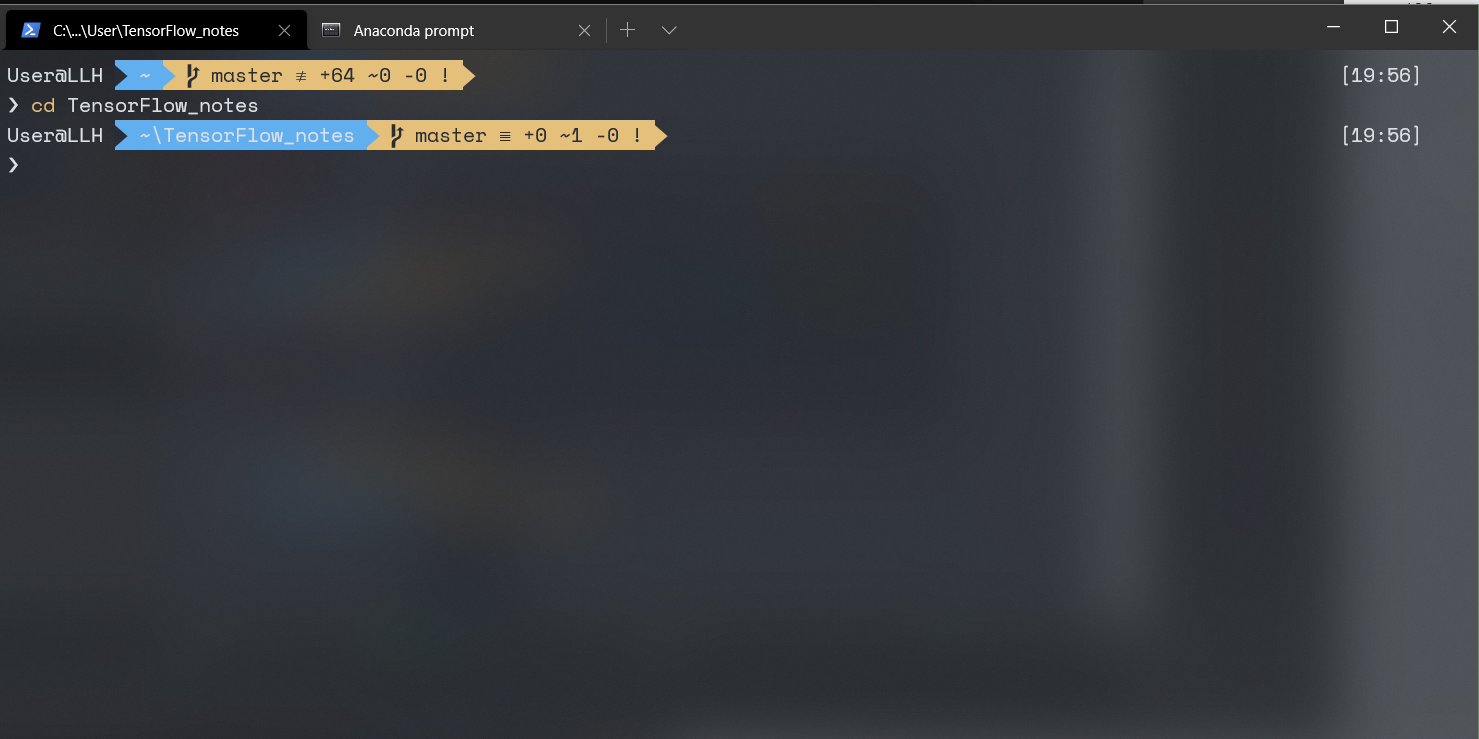

### References:

1. [Microsoft 說明文件](https://docs.microsoft.com/en-us/powershell/scripting/community/contributing/powershell-style-guide?view=powershell-7)
2. [Microsoft chcp](https://docs.microsoft.com/zh-tw/windows-server/administration/windows-commands/chcp)
2. [頁碼相關說明](https://blog.miniasp.com/post/2017/12/06/Microsoft-YaHei-Mono-Chinese-Font-for-Command-Prompt-and-WSL)
3. [設定永久 UTF-8](https://www.thinkinmd.com/post/2020/02/21/command-prompt-and-windows-powershell-default-use-utf-8/)
4. [Wikipedia 頁碼表](https://zh.wikipedia.org/wiki/%E4%BB%A3%E7%A0%81%E9%A1%B5)
---
其他:
- 1. [延伸](https://zhuanlan.zhihu.com/p/76436374)